In [1]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe
from numba import njit
from scipy.special import factorial, binom

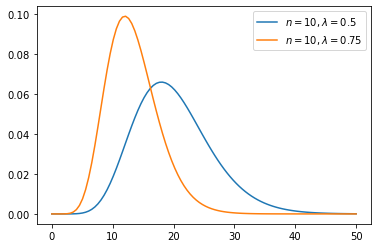

In [2]:
t_grid = np.linspace(0, 50, 100)

class Erlang:

    def __init__(self, λ=0.5, n=10):
        self.λ, self.n = λ, n

    def __call__(self, t):
        n, λ = self.n, self.λ
        return (λ**n * t**(n-1) * np.exp(-λ * t)) / factorial(n-1)

e1 = Erlang(n=10, λ=0.5)
e2 = Erlang(n=10, λ=0.75)

fig, ax = plt.subplots()
for e in e1, e2:
    ax.plot(t_grid, e(t_grid), label=f'$n={e.n}, \lambda={e.λ}$')

ax.legend()
plt.show()

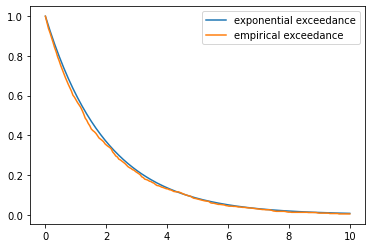

In [3]:
λ = 0.5 
np.random.seed(1234)
t_grid = np.linspace(0, 10, 200)

@njit
def draw_X(s=1.0, n=1_000):
    draws = np.empty(n)
    for i in range(n):
        Y = np.random.exponential(scale=1/λ)
        if Y <= s:
            X = Y
        else:
            Z = np.random.exponential(scale=1/λ)
            X = s + Z
        draws[i] = X
    return draws

fig, ax = plt.subplots()
draws = draw_X()
empirical_exceedance = [np.mean(draws > t) for t in t_grid]
ax.plot(t_grid, np.exp(- λ * t_grid), label='exponential exceedance')
ax.plot(t_grid, empirical_exceedance, label='empirical exceedance')
ax.legend()

plt.show()


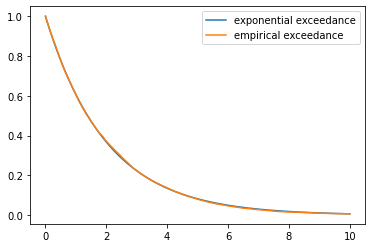

In [4]:
fig, ax = plt.subplots()
draws = draw_X(n=10_000)
empirical_exceedance = [np.mean(draws > t) for t in t_grid]
ax.plot(t_grid, np.exp(- λ * t_grid), label='exponential exceedance')
ax.plot(t_grid, empirical_exceedance, label='empirical exceedance')
ax.legend()

plt.show()
